<h2 style="color:green">Lab: Analyzing a real world dataset with SQL and Python </b></h2>

<h3 style="color:blue">Introduction<strong></h3>

In this notebook we will perform following tasks,

    1. Understand dataset [Selected Socioeconomic indicators in Chicago]
    2. Learn how to store data in Db2 database on IBM Cloud instance
    3. Solve some SQL problems

<h4>[A] Understand 'Selected Socioeconomic indicators in Chicago' dataset</h4>

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](
https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2), but to summarize, the dataset has the following variables:

* **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

* **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago 

* **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

* **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

* **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

* **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

* **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

* **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

* **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


<h4>[B] Store dataset in Db2 database on IBM Cloud instance</h4>

<h5>1. Connect to the database</h5>

In [14]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [15]:
# Enter Db2 credentials in the connection string below
%sql ibm_db_sa://******

'Connected: hrt90440@BLUDB'

<h5>2. Store dataset in a Table</h5>

<span>In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. To analyze the data using SQL, it first needs to be stored in the database.</span>
</br></br>
<span>We will first read the dataset source .CSV from the internet into pandas dataframe.</span>
</br>

In [16]:
import pandas as pd

chicago_socioeconomic_data = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

# print first 5 results
chicago_socioeconomic_data.head()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


<span>Then we need to create a table in our Db2 database to store the dataset. The PERSIST command in SQL "magic" simplifies the process of table creation and writing the data from a `pandas` dataframe into the table.</span>

In [17]:
# Drop table if it already exists

%sql DROP TABLE chicago_socioeconomic_data

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[]

In [18]:

%sql PERSIST chicago_socioeconomic_data

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB


'Persisted chicago_socioeconomic_data'

In [19]:
# Query database to make sure, we have successfully stored data in the table

%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


index,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


<h4>[C] Problems</h4>

<h5>1. How many rows are in the dataset?</h5> 

In [20]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
78


<h5>2. How many community areas in Chicago have a hardship index greater than 50.0?</h5> 

In [21]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index >50.0;

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
38


<h5>3. What is the maximum value of hardship index in this dataset?</h5> 

In [22]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


1
98.0


<h5>4. Which community area has the highest hardship index?</h5> 

In [23]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = (SELECT MAX(hardship_index) FROM chicago_socioeconomic_data)

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Riverdale


<h5>5. Which Chicago community areas have per-capita incomes greater thatn $60,000?</h5> 

In [24]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ >60000;

 * ibm_db_sa://hrt90440:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


<h5>6. Create a scatter plot using the variables <code>per_capita_income_</code> and <code>hardship_index</code>. Explain the correlation between the two variables.</h5> 

In [25]:
# install seaborn library if it is not already installed
!pip install seaborn

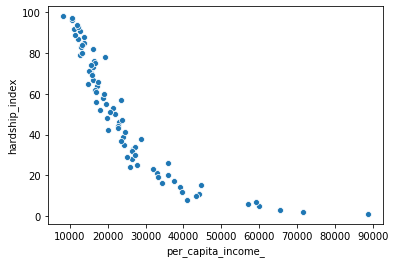

In [26]:
%matplotlib inline

import seaborn as sn

sn.scatterplot(x=chicago_socioeconomic_data['per_capita_income_'],y= chicago_socioeconomic_data['hardship_index'])


<span> As the 'Per Capita Income' of a community area rises, the 'Hardship Index' of that community area deceases. This is an indication of <code>Negative Correlation</code> between these two features.</span>